In [92]:
import sklearn as sk
import sklearn.covariance as cov
import pandas as pd
import numpy as np
from ggplot import *

train_original = pd.DataFrame.from_csv("cleaned_train.csv")
data = train_original.copy()

apply_price_log = True
log_method = np.log
exp_method = np.exp
if apply_price_log:
    data['SalePrice'] = data['SalePrice'].map(log_method) #'LOGLOGLO'
    
train = data.as_matrix()
names = data.columns

/usr/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


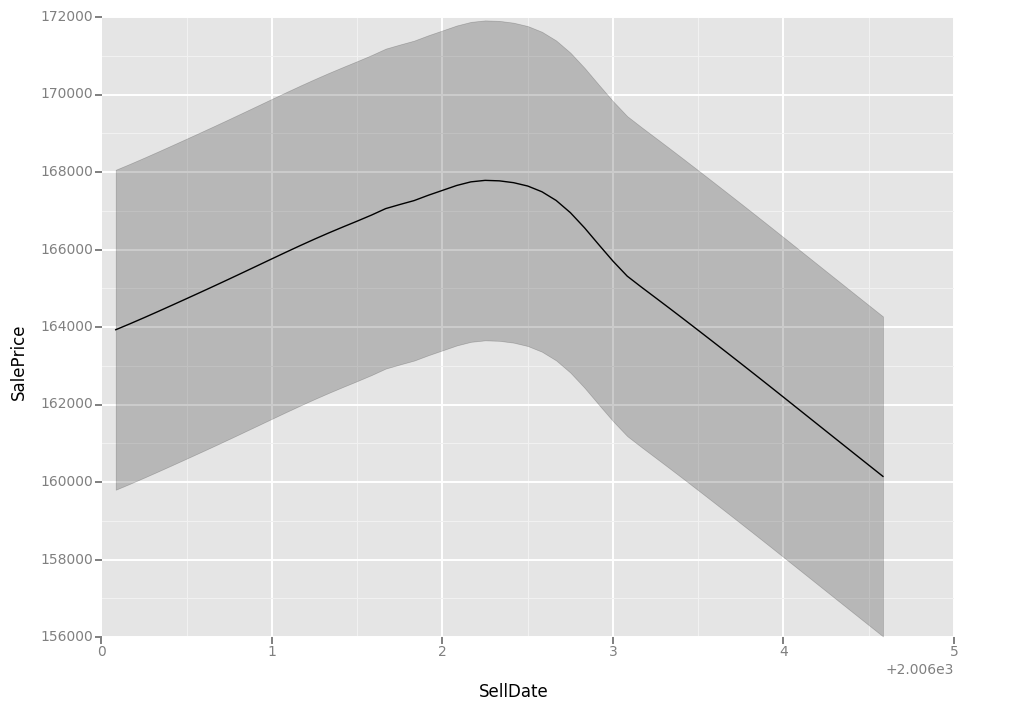

<ggplot: (-9223363252397887463)>

In [93]:
ggplot(train_original,aes(x='SellDate',y='SalePrice')) + stat_smooth(method='lowess')

In [94]:
# Scale some features correctly
#data['OverallQual'] = train_original['OverallQual'].apply(lambda x:x**3)

# Drop features with low variance
import sklearn.feature_selection as sel

thredsh = sel.VarianceThreshold(threshold=0.0) # comparing with plots  0.003 seems to be a good threshold; no it doesn't. dont do it
thredsh.fit(train)
deselected = ~thredsh.get_support()
data = data.drop(names[deselected],axis=1)

# regenerate matrix
train = data.as_matrix()
names = data.columns

In [95]:
import sklearn.preprocessing as pre

# scale all
scaler = pre.RobustScaler()#StandardScaler sucks
train = scaler.fit_transform(train)

In [96]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

labels = train[:,0]
features = train[:,1:]

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

In [97]:
# We learned: neural networks suck balls at predicting house prices. Don't use your brain when buing a house. As you tree.

#from sklearn import ensemble
#from sklearn import neural_network

    #fitter = sk.linear_model.Ridge(alpha=alpha)
    #fitter = sk.linear_model.Lasso(alpha=alpha) #sk.svm.SVR(kernel="linear")
    #fitter = ensemble.RandomForestRegressor()
    #fitter = ensemble.GradientBoostingRegressor(n_estimators=1800,max_leaf_nodes=10,learning_rate=0.005, random_state=1337, loss='ls')
#fitter = neural_network.MLPRegressor(hidden_layer_sizes=(1000,), activation='logistic',solver='sgd', max_iter=500)
    
#scores = cross_val_score(fitter,features,labels,cv=10,scoring='neg_mean_squared_error',n_jobs=4)
#print("RMSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

In [98]:
from sklearn import ensemble


    #fitter = sk.linear_model.Ridge(alpha=alpha)
    #fitter = sk.linear_model.Lasso(alpha=alpha) #sk.svm.SVR(kernel="linear")
#fitter = ensemble.RandomForestRegressor(n_estimators=1000,max_depth=100,max_features="auto",n_jobs=4)
fitter = ensemble.GradientBoostingRegressor(
    n_estimators=1800,max_leaf_nodes=15,learning_rate=0.005, random_state=78958, loss='ls')
 

scores = cross_val_score(fitter,features,labels,cv=12,scoring='neg_mean_squared_error',n_jobs=4)
print("RMSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

RMSE: -0.06080 (+/- 0.03684)


RMSE: -0.05971 (+/- 0.03689)
RMSE: -0.06063 (+/- 0.03720)


In [71]:
leaf_data = []
#for i in range(13,21,1):
#    fitter = ensemble.GradientBoostingRegressor(n_estimators=1800,max_leaf_nodes=i,learning_rate=0.005, random_state=78958, loss='ls')
#    leaf_data.append(cross_val_score(fitter,features,labels,cv=12,scoring='neg_mean_squared_error',n_jobs=4))
#print("RMSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

RMSE: -0.08878 (+/- 0.09474) (neue werte, kein log)
RMSE: -0.06129 (+/- 0.03523) (neue werte, log(preise))



In [99]:
fitter.fit(features,labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=15,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1800, presort='auto', random_state=78958,
             subsample=1.0, verbose=0, warm_start=False)

In [73]:
importance = fitter.feature_importances_
sort = np.argsort(importance)[::-1]
list(zip(importance[sort],names[1:][sort]))

[(0.081895647314742817, 'GrLivArea'),
 (0.067257312026470922, 'OverallQual'),
 (0.058290419392697343, 'LotArea'),
 (0.049322961331459372, 'OverallCond'),
 (0.041002617874619347, 'GarageArea'),
 (0.034576042214077216, 'gen_discount'),
 (0.034060249513705142, 'TotalBsmtSF'),
 (0.033757208063837106, 'GarageYrBlt'),
 (0.032278257350271532, 'YearBuilt'),
 (0.030807045517205658, 'SellDate'),
 (0.030272201909511933, 'nbh_score'),
 (0.027364855664898463, 'YearRemodAdd'),
 (0.025587053852651687, 'BsmtFinSF1'),
 (0.025388827409741042, 'gen_nbrhd_multipliers'),
 (0.024202693591743953, '1stFlrSF'),
 (0.024047884443512038, 'gen_total_porch'),
 (0.021395163566965265, 'KitchenQual'),
 (0.018475652211877434, 'BsmtUnfSF'),
 (0.018260908010737972, 'Functional'),
 (0.016211360889792029, 'Fireplaces'),
 (0.015964739933608085, 'WoodDeckSF'),
 (0.015202799550736425, 'gen_loudness'),
 (0.014754776280896617, 'BsmtExposure'),
 (0.013867826969042873, 'BsmtFinType1'),
 (0.012263306593830006, 'ExBrkFace'),
 (0.01

In [100]:
to_predict = pd.DataFrame.from_csv("cleaned_test.csv")
# apply transformations
to_predict = to_predict.drop(train_original.columns[deselected],axis=1)
to_predict_matrix = to_predict.as_matrix()
to_predict_matrix = scaler.transform(to_predict_matrix)

In [101]:
features = to_predict_matrix[:,1:]
labels = fitter.predict(features)
prices = scaler.inverse_transform(np.insert(features,0,labels,axis=1))

In [102]:
to_predict['SalePrice'] = prices
if apply_price_log:
    to_predict['SalePrice'] = to_predict['SalePrice'].map(exp_method)
to_predict[['SalePrice']].to_csv("submission.csv")

In [31]:
to_predict[['SalePrice']]

,SalePrice
Id,
1461,118046.973432
1462,164192.090506
1463,188531.996711
1464,187792.555178
1465,194379.674009
1466,175140.929468
1467,168214.534240
1468,169285.248299
1469,189808.848909
